In [1]:
%store -r __toolboxforsalesdata

In [2]:
__toolboxforsalesdata

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
from catboost import CatBoostClassifier

In [157]:
for_id = pd.read_csv("test.csv")

In [4]:
train_df_old = pd.read_csv("train_new_feature.csv")

In [5]:
test_df_old = pd.read_csv("test_new_feature.csv")

In [6]:
train_df = pd.read_csv("train_new_features_2.csv")

In [7]:
test_df = pd.read_csv("test_new_features_2.csv")

In [8]:
#Lets try fitting an Logistic on train_df.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_cv , val_cv = train_test_split(train_df)

In [11]:
train_cv_old , val_cv_old = train_test_split(train_df_old)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(train_df.drop('class', axis = 1))
scaler_2 = StandardScaler()
scaler_2.fit(train_df_old.drop('class', axis = 1))
train_df_std = scaler.transform(train_df.drop('class', axis = 1))
train_df_old_std = scaler_2.transform(train_df_old.drop('class', axis = 1))

In [15]:
X_train_cv_std , X_val_cv_std = train_test_split(train_df_std)

In [16]:
X_train_cv_old_std , X_val_cv_old_std = train_test_split(train_df_old_std)

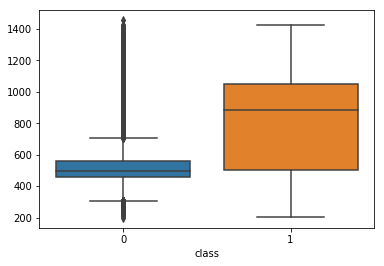

In [17]:
sns.boxplot(train_df['class'],train_df['maximum_heart_rate_achieved']*train_df['thal'])

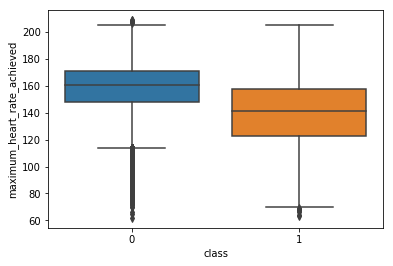

In [18]:
sns.boxplot(train_df['class'],train_df['maximum_heart_rate_achieved'])

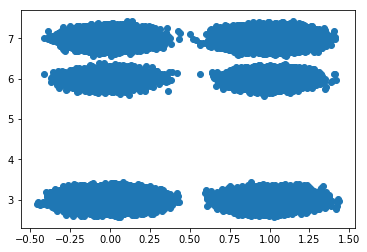

In [19]:
plt.scatter(train_df['class']+np.random.randn(len(train_df))/10,train_df['thal']+np.random.randn(len(train_df))/10)
plt.show()

In [20]:
np.unique(train_df['thal'])

array([3, 6, 7])

In [22]:
train_df.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,...,age_sex,sex_chest,age_chest,cholestoral_age_sex,big_mix,class,chest_cat_mean_enc,num_vessels_and_angina_less_one,oldpeak*slope,is_rev_defect
0,49.207124,0,4.000000,162.996167,181.108682,0,148.227858,1,0.944547,2,...,0.000000,0.000000,196.828496,0.000000,0.000000,1,0.702245,0,1.889094,False
1,53.628425,1,1.741596,130.233730,276.474630,2,152.917139,0,0.119070,2,...,53.628425,1.741596,93.399050,14826.898959,0.000000,0,0.198040,1,0.238140,False
2,49.591426,1,4.000000,146.999012,223.300517,2,102.352090,1,1.616747,2,...,49.591426,4.000000,198.365704,11073.791065,204116.937519,1,0.702800,0,3.233494,True
3,58.991445,1,4.000000,112.369143,187.245501,0,158.164750,1,0.000000,1,...,58.991445,4.000000,235.965780,11045.882674,46401.726833,1,0.702343,0,0.000000,True
4,51.053602,1,1.954609,138.032047,238.482868,0,172.540828,0,1.150464,1,...,51.053602,1.954609,99.789830,12175.409427,0.000000,0,0.198025,0,1.150464,False


In [23]:
train_df['is_rev_defect'] = (train_df['thal'] == 7)
train_df['thal_max_heart_rate'] = train_df['thal']*train_df['maximum_heart_rate_achieved']
train_df.drop(['big_mix'], axis = 1 , inplace = True)
train_df['is_rev_defect'] = train_df['is_rev_defect'].astype(int)
train_df.drop('chest', axis = 1 , inplace= True)

In [25]:
#Mean encoding for number of vessels?

In [28]:
#Number of vessels narrowing > 50%

In [29]:
#Okay, lets see if catboost picks something.

In [30]:
train_df.head()

,age,sex,resting_blood_pressure,serum_cholestoral,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,...,age_sex,sex_chest,age_chest,cholestoral_age_sex,class,chest_cat_mean_enc,num_vessels_and_angina_less_one,oldpeak*slope,is_rev_defect,thal_max_heart_rate
0,49.207124,0,162.996167,181.108682,0,148.227858,1,0.944547,2,0,...,0.000000,0.000000,196.828496,0.000000,1,0.702245,0,1.889094,0,444.683574
1,53.628425,1,130.233730,276.474630,2,152.917139,0,0.119070,2,0,...,53.628425,1.741596,93.399050,14826.898959,0,0.198040,1,0.238140,0,458.751417
2,49.591426,1,146.999012,223.300517,2,102.352090,1,1.616747,2,2,...,49.591426,4.000000,198.365704,11073.791065,1,0.702800,0,3.233494,1,716.464630
3,58.991445,1,112.369143,187.245501,0,158.164750,1,0.000000,1,1,...,58.991445,4.000000,235.965780,11045.882674,1,0.702343,0,0.000000,1,1107.153250
4,51.053602,1,138.032047,238.482868,0,172.540828,0,1.150464,1,1,...,51.053602,1.954609,99.789830,12175.409427,0,0.198025,0,1.150464,0,517.622484


In [31]:
train_df['oldpeak*slope'] = train_df['oldpeak']*train_df['slope']

In [32]:
train_cv , val_cv = train_test_split(train_df)

In [33]:
params1 = {'iterations':10000, 'learning_rate':0.2, 'depth':8,'eval_metric':'Accuracy','random_seed':333,'use_best_model':True,'early_stopping_rounds':30,
          'thread_count':5}
cat_x_3 = CatBoostClassifier(**params1)
cat_x_3.fit(train_cv.drop('class',axis = 1), train_cv['class'],eval_set=(val_cv.drop('class',axis = 1), val_cv['class']),verbose = 1)

In [58]:
#do not delete

0:	learn: 0.8811378	test: 0.8816600	best: 0.8816600 (0)	total: 195ms	remaining: 32m 27s
1:	learn: 0.8828422	test: 0.8835200	best: 0.8835200 (1)	total: 383ms	remaining: 31m 53s
2:	learn: 0.8867444	test: 0.8875267	best: 0.8875267 (2)	total: 580ms	remaining: 32m 11s
3:	learn: 0.8896800	test: 0.8901133	best: 0.8901133 (3)	total: 746ms	remaining: 31m 3s
4:	learn: 0.8915733	test: 0.8918533	best: 0.8918533 (4)	total: 946ms	remaining: 31m 30s
5:	learn: 0.8931422	test: 0.8929600	best: 0.8929600 (5)	total: 1.16s	remaining: 32m 18s
6:	learn: 0.8939356	test: 0.8939067	best: 0.8939067 (6)	total: 1.42s	remaining: 33m 46s
7:	learn: 0.8948778	test: 0.8948667	best: 0.8948667 (7)	total: 1.62s	remaining: 33m 48s
8:	learn: 0.8966844	test: 0.8966933	best: 0.8966933 (8)	total: 1.82s	remaining: 33m 44s
9:	learn: 0.8971933	test: 0.8973267	best: 0.8973267 (9)	total: 2.01s	remaining: 33m 29s
10:	learn: 0.8988022	test: 0.8989533	best: 0.8989533 (10)	total: 2.17s	remaining: 32m 47s
11:	learn: 0.8992200	test: 0.89

92:	learn: 0.9060244	test: 0.9041200	best: 0.9043533 (76)	total: 18.7s	remaining: 33m 14s
93:	learn: 0.9061044	test: 0.9041533	best: 0.9043533 (76)	total: 18.9s	remaining: 33m 9s
94:	learn: 0.9061111	test: 0.9041333	best: 0.9043533 (76)	total: 19s	remaining: 33m 4s
95:	learn: 0.9061400	test: 0.9041133	best: 0.9043533 (76)	total: 19.2s	remaining: 33m
96:	learn: 0.9062022	test: 0.9042333	best: 0.9043533 (76)	total: 19.4s	remaining: 33m
97:	learn: 0.9062600	test: 0.9042933	best: 0.9043533 (76)	total: 19.5s	remaining: 32m 54s
98:	learn: 0.9062889	test: 0.9043600	best: 0.9043600 (98)	total: 19.7s	remaining: 32m 52s
99:	learn: 0.9063111	test: 0.9043333	best: 0.9043600 (98)	total: 19.9s	remaining: 32m 46s
100:	learn: 0.9063289	test: 0.9043133	best: 0.9043600 (98)	total: 20s	remaining: 32m 44s
101:	learn: 0.9063533	test: 0.9043067	best: 0.9043600 (98)	total: 20.2s	remaining: 32m 39s
102:	learn: 0.9064111	test: 0.9043333	best: 0.9043600 (98)	total: 20.4s	remaining: 32m 38s
103:	learn: 0.9064156

In [90]:
val_pred_cat_x_3 = cat_x_3.predict(val_cv.drop('class',axis = 1))

In [59]:
val_pred_cat_x_3_proba = cat_x_3.predict_proba(val_cv.drop('class',axis = 1))

In [213]:
from catboost import Pool

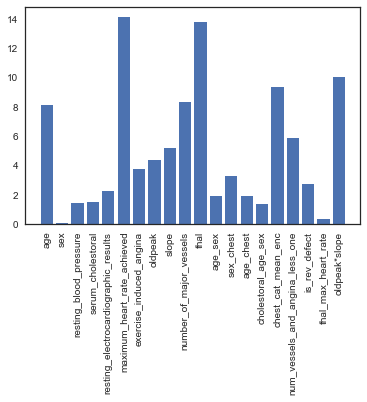

In [208]:
feat_imp = cat_x_3.get_feature_importance(Pool(train_cv.drop('class',axis = 1)))
plt.figure()
plt.bar(train_cv.drop('class',axis = 1).columns.values, feat_imp)
plt.xticks(rotation = 90)
plt.show()

In [35]:
scaler = StandardScaler()
scaler.fit(train_df.drop('class', axis = 1))
scaler_2 = StandardScaler()
scaler_2.fit(train_df_old.drop('class', axis = 1))
train_df_std = scaler.transform(train_df.drop('class', axis = 1))
train_df_old_std = scaler_2.transform(train_df_old.drop('class', axis = 1))

In [36]:
train_cv_old_std, val_cv_old_std = train_test_split(train_df_old_std)

In [ ]:
#lets see rf on this new dataset.

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
rf_x_2 = RandomForestClassifier(n_estimators=1000, max_depth=10, max_features=None, n_jobs=-1, verbose = 1)

In [162]:
rf_x_2.fit(train_cv.drop('class',axis = 1), train_cv['class'])

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 80.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 286.6min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [163]:
val_rf_2_pred_proba = rf_x_2.predict_proba(val_cv.drop('class', axis = 1))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    8.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   11.1s finished


In [164]:
val_rf_2_pred = rf_x_2.predict(val_cv.drop('class', axis = 1))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   10.5s finished


In [165]:
train_rf_2_pred = rf_x_2.predict(train_cv.drop('class', axis = 1))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    6.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 60.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 60.3min
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed: 60.4min finished


In [166]:
sum(val_rf_2_pred==val_cv['class'])/len(val_cv)

0.8951666666666667

In [167]:
sum(train_rf_2_pred==train_cv['class'])/len(train_cv)

0.9013622222222222

In [170]:
sum(val_rf_2_pred==val_cv['class'])/len(val_cv)

0.8951666666666667

In [64]:
sum(val_rf_2_pred==val_cv['class'])/len(val_rf_2_pred)

0.8903733333333333

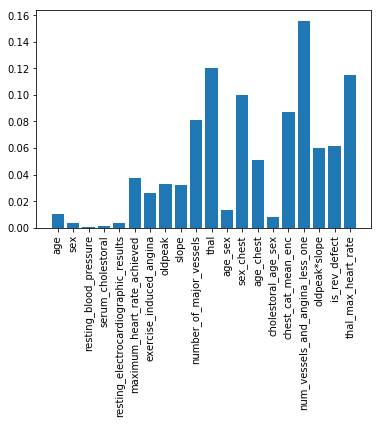

In [65]:
for_plot = pd.DataFrame({'col':val_cv.drop('class', axis = 1).columns.values,'imp':rf_x_2.feature_importances_})

plt.bar(for_plot['col'],for_plot['imp'])
plt.xticks(rotation = 90)
plt.show()

In [172]:
#lets puT A LOGISTIC LAYER no its giving the same result as catboost.
train_pred_cat_x_3_proba = cat_x_3.predict_proba(train_cv.drop('class',axis = 1))

In [173]:
train_rf_2_pred_proba = rf_x_2.predict_proba(train_cv.drop('class', axis = 1))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    9.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   19.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   25.3s finished


In [174]:
#Logistic Layer.
stack_cv_train = pd.DataFrame({'rf':train_rf_2_pred_proba[:,1], 'cat':train_pred_cat_x_3_proba[:,1]})

In [175]:
#Logistic Layer.
stack_cv_val = pd.DataFrame({'rf':val_rf_2_pred_proba[:,1], 'cat':val_pred_cat_x_3_proba[:,1]})

In [176]:
stack_cv_val

,cat,rf
0,0.026163,0.042862
1,0.002260,0.004394
2,0.983653,0.977700
3,0.468239,0.822475
4,0.936519,0.825355
5,0.807923,0.803723
6,0.254021,0.417209
7,0.733717,0.689935
8,0.998590,0.980608
9,0.798151,0.722484


In [180]:
stack_new_feats_2 = LogisticRegression(C=1)

In [181]:
stack_new_feats_2.fit(stack_cv_train, train_cv['class'])

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [182]:
stack_new_feats_2.score(stack_cv_train, train_cv['class'])

0.9064711111111111

In [188]:
val_check = stack_new_feats_2.predict(stack_cv_val)

In [186]:
stack_cv_val_pred = stack_cv_val.copy()

In [187]:
stack_cv_val[stack_cv_val>0.5] = 1
stack_cv_val[stack_cv_val<=0.5] = 0

In [189]:
sum(stack_cv_val['cat']!=val_check)

0

In [108]:
from tqdm import tqdm

In [111]:
best_alpha = 0.5
alphas = np.arange(0,1,0.1)
temp_pred= val_check[:,1].copy()
temp_pred[temp_pred>0.5] = 1
temp_pred[temp_pred<=0.5] = 0
best_accuracy = sum(temp_pred == val_cv['class'])/len(val_cv)
for alpha in tqdm(alphas):
    temp_pred = val_check[:,1].copy()
    temp_pred[temp_pred >= alpha] = 1
    temp_pred[temp_pred < alpha] = 0
    temp_accuracy = sum(temp_pred == val_cv['class'])/len(val_cv)
    if (temp_accuracy > best_accuracy):
        best_alpha= alpha
        best_accuracy = temp_accuracy
        print(best_accuracy)

100%|██████████| 10/10 [00:04<00:00,  2.31it/s]


In [112]:
best_accuracy

0.90436

In [ ]:
#Training full, looks like a big one.

In [137]:
params1_full = {'iterations':98, 'learning_rate':0.2, 'depth':8,'eval_metric':'Accuracy','random_seed':333,'use_best_model':True,'early_stopping_rounds':30,
          'thread_count':5}

In [152]:
cat_full_3 = CatBoostClassifier(**params1_full)
cat_full_3.fit(train_df.drop('class',axis = 1), train_df['class'],eval_set=(train_df.drop('class',axis = 1), train_df['class']),verbose = 1)

0:	learn: 0.8792733	test: 0.8792733	best: 0.8792733 (0)	total: 303ms	remaining: 29.4s
1:	learn: 0.8836983	test: 0.8836983	best: 0.8836983 (1)	total: 645ms	remaining: 31s
2:	learn: 0.8880617	test: 0.8880617	best: 0.8880617 (2)	total: 1.03s	remaining: 32.5s
3:	learn: 0.8901483	test: 0.8901483	best: 0.8901483 (3)	total: 1.3s	remaining: 30.5s
4:	learn: 0.8916233	test: 0.8916233	best: 0.8916233 (4)	total: 1.61s	remaining: 30s
5:	learn: 0.8934350	test: 0.8934350	best: 0.8934350 (5)	total: 1.85s	remaining: 28.4s
6:	learn: 0.8942867	test: 0.8942867	best: 0.8942867 (6)	total: 2.14s	remaining: 27.8s
7:	learn: 0.8949567	test: 0.8949567	best: 0.8949567 (7)	total: 2.38s	remaining: 26.8s
8:	learn: 0.8959400	test: 0.8959400	best: 0.8959400 (8)	total: 2.63s	remaining: 26s
9:	learn: 0.8965150	test: 0.8965150	best: 0.8965150 (9)	total: 2.94s	remaining: 25.9s
10:	learn: 0.8980633	test: 0.8980633	best: 0.8980633 (10)	total: 3.17s	remaining: 25.1s
11:	learn: 0.8992367	test: 0.8992367	best: 0.8992367 (11)	t

94:	learn: 0.9058550	test: 0.9058550	best: 0.9058550 (94)	total: 24.5s	remaining: 774ms
95:	learn: 0.9058633	test: 0.9058633	best: 0.9058633 (95)	total: 24.7s	remaining: 515ms
96:	learn: 0.9059117	test: 0.9059117	best: 0.9059117 (96)	total: 25s	remaining: 258ms
97:	learn: 0.9059367	test: 0.9059367	best: 0.9059367 (97)	total: 25.2s	remaining: 0us

bestTest = 0.9059366667
bestIteration = 97



In [153]:
#Making test with new features.
test_df['is_rev_defect'] = (test_df['thal'] == 7)
test_df['thal_max_heart_rate'] = test_df['thal']*test_df['maximum_heart_rate_achieved']
test_df.drop(['big_mix'], axis = 1 , inplace = True)
test_df['is_rev_defect'] = test_df['is_rev_defect'].astype(int)
test_df.drop('chest', axis = 1 , inplace= True)

In [154]:
test_df = test_df[train_df.drop('class', axis = 1).columns]

In [205]:
test_df.head()

,age,sex,resting_blood_pressure,serum_cholestoral,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,age_sex,sex_chest,age_chest,cholestoral_age_sex,chest_cat_mean_enc,num_vessels_and_angina_less_one,oldpeak*slope,is_rev_defect,thal_max_heart_rate
0,53.963191,1,136.940829,236.862814,2,143.961525,1,0.711100,1,2,7,53.963191,4.000000,215.852764,12781.873273,0.702450,0,0.711100,1,1007.730675
1,49.621479,1,122.024651,226.593019,2,112.220874,1,0.000000,1,1,7,49.621479,4.000000,198.485916,11243.880734,0.702450,0,0.000000,1,785.546118
2,36.933893,1,127.585643,351.061046,0,177.945922,0,0.313078,1,0,7,36.933893,1.300924,48.048188,12966.051109,0.197894,1,0.313078,1,1245.621454
3,54.884588,1,124.876745,250.370530,0,153.176526,0,0.308277,1,1,7,54.884588,3.000000,164.653764,13741.483386,0.219477,0,0.308277,1,1072.235682
4,71.016392,0,120.922600,210.979710,0,164.573122,0,1.021370,1,1,3,0.000000,0.000000,124.063648,0.000000,0.197894,0,1.021370,0,493.719366


In [155]:
catboost_3_new_feat = cat_full_3.predict(test_df)

In [159]:
catboost_3_new_feat = catboost_3_new_feat.astype(int)

In [160]:
submit = pd.DataFrame({'ID': for_id['ID'], 'class':catboost_3_new_feat})
submit.to_csv('catboost_3_new_feat.csv', index = False)

In [192]:
np.unique(train_df['slope'])

array([1, 2, 3])

In [ ]:
#Make slope categorical and one-hot it.

In [193]:
train_df.loc[train_df['slope'] == 1, 'slope'] = 'A'
train_df.loc[train_df['slope'] == 2, 'slope'] = 'B'
train_df.loc[train_df['slope'] == 3, 'slope'] = 'C'

In [194]:
train_df_dummy_slope = pd.get_dummies(train_df)

In [197]:
train_cv_dummy_slope, val_cv_dummy_slope = train_test_split(train_df_dummy_slope)

In [200]:
params_dum = {'iterations':10000, 'learning_rate':0.2, 'depth':11,'eval_metric':'Accuracy','random_seed':333,'use_best_model':True,'early_stopping_rounds':30,
          'thread_count':5}
cat_x_4 = CatBoostClassifier(**params_dum)
cat_x_4.fit(train_cv_dummy_slope.drop('class',axis = 1), train_cv_dummy_slope['class'],eval_set=(val_cv_dummy_slope.drop('class',axis = 1), val_cv_dummy_slope['class']),verbose = 1)

0:	learn: 0.8893489	test: 0.8888533	best: 0.8888533 (0)	total: 565ms	remaining: 1h 34m 9s
1:	learn: 0.8916400	test: 0.8903933	best: 0.8903933 (1)	total: 1.09s	remaining: 1h 30m 29s
2:	learn: 0.8933000	test: 0.8924200	best: 0.8924200 (2)	total: 1.36s	remaining: 1h 15m 45s
3:	learn: 0.8947644	test: 0.8932667	best: 0.8932667 (3)	total: 1.86s	remaining: 1h 17m 19s
4:	learn: 0.8974000	test: 0.8958667	best: 0.8958667 (4)	total: 2.38s	remaining: 1h 19m 7s
5:	learn: 0.8984733	test: 0.8970067	best: 0.8970067 (5)	total: 2.85s	remaining: 1h 19m 15s
6:	learn: 0.8995111	test: 0.8984133	best: 0.8984133 (6)	total: 3.32s	remaining: 1h 19m 2s
7:	learn: 0.9002422	test: 0.8986800	best: 0.8986800 (7)	total: 3.79s	remaining: 1h 18m 53s
8:	learn: 0.9010356	test: 0.8989800	best: 0.8989800 (8)	total: 4.24s	remaining: 1h 18m 24s
9:	learn: 0.9015978	test: 0.8992733	best: 0.8992733 (9)	total: 4.67s	remaining: 1h 17m 41s
10:	learn: 0.9022178	test: 0.8997267	best: 0.8997267 (10)	total: 5.11s	remaining: 1h 17m 17s


In [203]:
from catboost import Pool

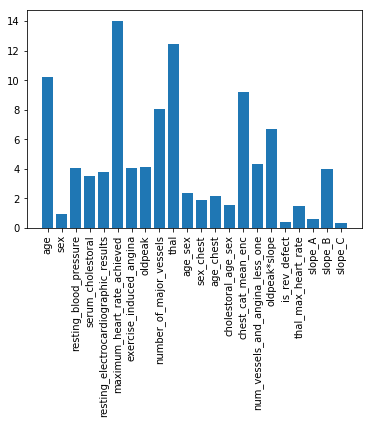

In [204]:
feat_imp = cat_x_4.get_feature_importance(Pool(train_cv_dummy_slope.drop('class',axis = 1)))
plt.figure()
plt.bar(train_cv_dummy_slope.drop('class',axis = 1).columns.values, feat_imp)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#Combining models with different features.

In [ ]:
#catboost trained on  features now, features_new, features_new_2

In [209]:
train_df.to_csv('train_new_feature_3.csv', index = False)

In [210]:
test_df.to_csv('test_new_feature_3.csv', index = False)

In [211]:
cat_full_3_for_stack = cat_full_3.copy()

In [212]:
cat_x_3_for_stack = cat_x_3.copy()

In [213]:
train_df_1 = pd.read_csv('train_new_feature.csv')
test_df_1  = pd.read_csv('test_new_feature.csv')
train_df_2 = pd.read_csv('train_new_features_2.csv')
test_df_2 = pd.read_csv('test_new_features_2.csv')
train_df_3 = pd.read_csv('train_new_feature_3.csv')
test_df_3 = pd.read_csv('test_new_feature_3.csv')

In [215]:
train_cv_1, val_cv_1 = train_test_split(train_df_1)

In [216]:
train_cv_2, val_cv_2 = train_test_split(train_df_2)

In [326]:
params_1_for_stack = {'iterations':10000, 'learning_rate':0.2, 'depth':5,'eval_metric':'Accuracy','random_seed':333,'use_best_model':True,'early_stopping_rounds':30,
          'thread_count':5}
cat_x_1_for_stack = CatBoostClassifier(**params_1_for_stack)
cat_x_1_for_stack.fit(train_cv_1.drop('class',axis = 1), train_cv_1['class'],eval_set=(val_cv_1.drop('class',axis = 1), val_cv_1['class']),verbose = 1)

0:	learn: 0.8645978	test: 0.8660667	best: 0.8660667 (0)	total: 133ms	remaining: 22m 11s
1:	learn: 0.8778422	test: 0.8788933	best: 0.8788933 (1)	total: 257ms	remaining: 21m 24s
2:	learn: 0.8747911	test: 0.8756200	best: 0.8788933 (1)	total: 387ms	remaining: 21m 30s
3:	learn: 0.8808289	test: 0.8819667	best: 0.8819667 (3)	total: 553ms	remaining: 23m 1s
4:	learn: 0.8839778	test: 0.8847067	best: 0.8847067 (4)	total: 761ms	remaining: 25m 20s
5:	learn: 0.8864578	test: 0.8869667	best: 0.8869667 (5)	total: 909ms	remaining: 25m 14s
6:	learn: 0.8869889	test: 0.8878333	best: 0.8878333 (6)	total: 1.05s	remaining: 25m 5s
7:	learn: 0.8889444	test: 0.8900800	best: 0.8900800 (7)	total: 1.21s	remaining: 25m 15s
8:	learn: 0.8905267	test: 0.8913867	best: 0.8913867 (8)	total: 1.37s	remaining: 25m 18s
9:	learn: 0.8913844	test: 0.8926133	best: 0.8926133 (9)	total: 1.53s	remaining: 25m 27s
10:	learn: 0.8921644	test: 0.8937133	best: 0.8937133 (10)	total: 1.68s	remaining: 25m 24s
11:	learn: 0.8928378	test: 0.894

92:	learn: 0.9034533	test: 0.9038000	best: 0.9038000 (92)	total: 19.9s	remaining: 35m 18s
93:	learn: 0.9035644	test: 0.9038467	best: 0.9038467 (93)	total: 20s	remaining: 35m 12s
94:	learn: 0.9035533	test: 0.9038733	best: 0.9038733 (94)	total: 20.2s	remaining: 35m 3s
95:	learn: 0.9035711	test: 0.9039333	best: 0.9039333 (95)	total: 20.3s	remaining: 34m 58s
96:	learn: 0.9035733	test: 0.9039200	best: 0.9039333 (95)	total: 20.5s	remaining: 34m 54s
97:	learn: 0.9035889	test: 0.9038800	best: 0.9039333 (95)	total: 20.6s	remaining: 34m 46s
98:	learn: 0.9036978	test: 0.9040467	best: 0.9040467 (98)	total: 20.8s	remaining: 34m 37s
99:	learn: 0.9037311	test: 0.9041133	best: 0.9041133 (99)	total: 20.9s	remaining: 34m 33s
100:	learn: 0.9037244	test: 0.9041533	best: 0.9041533 (100)	total: 21.1s	remaining: 34m 31s
101:	learn: 0.9037511	test: 0.9041267	best: 0.9041533 (100)	total: 21.4s	remaining: 34m 40s
102:	learn: 0.9037489	test: 0.9041267	best: 0.9041533 (100)	total: 21.6s	remaining: 34m 36s
103:	le

In [327]:
train_pred_x_1 = cat_x_1_for_stack.predict_proba(train_cv_1.drop('class',axis = 1), ntree_end=cat_x_1_for_stack.best_iteration_)

In [328]:
val_pred_x_1 = cat_x_1_for_stack.predict_proba(val_cv_1.drop('class',axis = 1), ntree_end=cat_x_1_for_stack.best_iteration_)

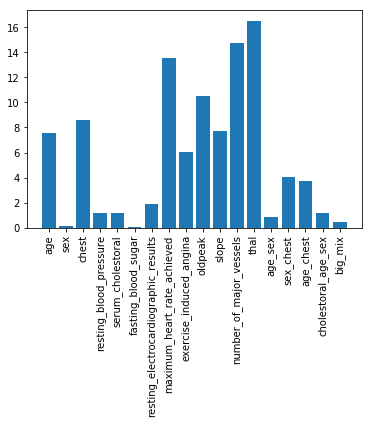

In [329]:
feat_imp = cat_x_1_for_stack.get_feature_importance(Pool(train_cv_1.drop('class',axis = 1)))
plt.figure()
plt.bar(train_cv_1.drop('class',axis = 1).columns.values, feat_imp)
plt.xticks(rotation = 90)
plt.show()

In [332]:
params_2_for_stack = {'iterations':10000, 'learning_rate':0.2, 'depth':5,'eval_metric':'Accuracy','random_seed':333,'use_best_model':True,'early_stopping_rounds':30,
          'thread_count':5}

In [333]:
cat_x_2_for_stack = CatBoostClassifier(**params_2_for_stack)
cat_x_2_for_stack.fit(train_cv_2.drop('class',axis = 1), train_cv_2['class'],eval_set=(val_cv_2.drop('class',axis = 1), val_cv_2['class']),verbose = 1)

0:	learn: 0.8705422	test: 0.8722267	best: 0.8722267 (0)	total: 133ms	remaining: 22m 14s
1:	learn: 0.8742933	test: 0.8759867	best: 0.8759867 (1)	total: 259ms	remaining: 21m 34s
2:	learn: 0.8779000	test: 0.8791000	best: 0.8791000 (2)	total: 406ms	remaining: 22m 34s
3:	learn: 0.8808200	test: 0.8823200	best: 0.8823200 (3)	total: 576ms	remaining: 23m 59s
4:	learn: 0.8833067	test: 0.8849200	best: 0.8849200 (4)	total: 771ms	remaining: 25m 42s
5:	learn: 0.8845444	test: 0.8859533	best: 0.8859533 (5)	total: 910ms	remaining: 25m 15s
6:	learn: 0.8876578	test: 0.8888933	best: 0.8888933 (6)	total: 1.05s	remaining: 24m 59s
7:	learn: 0.8890200	test: 0.8903267	best: 0.8903267 (7)	total: 1.2s	remaining: 24m 57s
8:	learn: 0.8899800	test: 0.8909067	best: 0.8909067 (8)	total: 1.37s	remaining: 25m 24s
9:	learn: 0.8913267	test: 0.8922200	best: 0.8922200 (9)	total: 1.51s	remaining: 25m 12s
10:	learn: 0.8928067	test: 0.8937933	best: 0.8937933 (10)	total: 1.66s	remaining: 25m 4s
11:	learn: 0.8930267	test: 0.893

92:	learn: 0.9030622	test: 0.9040067	best: 0.9041133 (91)	total: 13.9s	remaining: 24m 39s
93:	learn: 0.9031600	test: 0.9041400	best: 0.9041400 (93)	total: 14s	remaining: 24m 39s
94:	learn: 0.9032222	test: 0.9044333	best: 0.9044333 (94)	total: 14.2s	remaining: 24m 38s
95:	learn: 0.9032356	test: 0.9044533	best: 0.9044533 (95)	total: 14.3s	remaining: 24m 39s
96:	learn: 0.9032711	test: 0.9044267	best: 0.9044533 (95)	total: 14.5s	remaining: 24m 40s
97:	learn: 0.9032578	test: 0.9044000	best: 0.9044533 (95)	total: 14.6s	remaining: 24m 38s
98:	learn: 0.9032756	test: 0.9043733	best: 0.9044533 (95)	total: 14.8s	remaining: 24m 37s
99:	learn: 0.9032956	test: 0.9043733	best: 0.9044533 (95)	total: 14.9s	remaining: 24m 37s
100:	learn: 0.9033089	test: 0.9043867	best: 0.9044533 (95)	total: 15.1s	remaining: 24m 35s
101:	learn: 0.9033444	test: 0.9044200	best: 0.9044533 (95)	total: 15.2s	remaining: 24m 34s
102:	learn: 0.9033178	test: 0.9043867	best: 0.9044533 (95)	total: 15.3s	remaining: 24m 32s
103:	lear

In [334]:
train_pred_x_2 = cat_x_2_for_stack.predict_proba(train_cv_2.drop('class',axis = 1),ntree_end=cat_x_2_for_stack.best_iteration_)

In [335]:
val_pred_x_2 = cat_x_2_for_stack.predict_proba(val_cv_2.drop('class',axis = 1),ntree_end=cat_x_2_for_stack.best_iteration_)

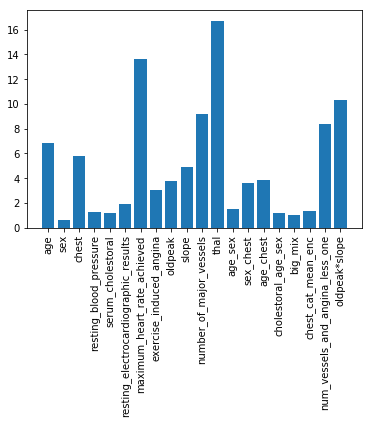

In [336]:
feat_imp = cat_x_2_for_stack.get_feature_importance(Pool(train_cv_2.drop('class',axis = 1)))
plt.figure()
plt.bar(train_cv_2.drop('class',axis = 1).columns.values, feat_imp)
plt.xticks(rotation = 90)
plt.show()

In [337]:
train_df_3.loc[train_df_3['slope'] == 'A', 'slope'] = 1
train_df_3.loc[train_df_3['slope'] == 'B', 'slope'] = 2
train_df_3.loc[train_df_3['slope'] == 'C', 'slope'] = 3

In [338]:
test_df_3.loc[train_df_3['slope'] == 'A', 'slope'] = 1
test_df_3.loc[train_df_3['slope'] == 'B', 'slope'] = 2
test_df_3.loc[train_df_3['slope'] == 'C', 'slope'] = 3

In [339]:
train_cv_3, val_cv_3 = train_test_split(train_df_3)

In [340]:
params_3_for_stack = {'iterations':10000, 'learning_rate':0.2, 'depth':5,'eval_metric':'Accuracy','random_seed':333,'use_best_model':True,'early_stopping_rounds':30,
          'thread_count':5}

In [341]:
cat_x_3_for_stack = CatBoostClassifier(**params_3_for_stack)
cat_x_3_for_stack.fit(train_cv_3.drop('class',axis = 1), train_cv_3['class'],eval_set=(val_cv_3.drop('class',axis = 1), val_cv_3['class']),verbose = 1)

0:	learn: 0.8707467	test: 0.8713933	best: 0.8713933 (0)	total: 132ms	remaining: 21m 58s
1:	learn: 0.8743756	test: 0.8750667	best: 0.8750667 (1)	total: 277ms	remaining: 23m 5s
2:	learn: 0.8767556	test: 0.8770800	best: 0.8770800 (2)	total: 427ms	remaining: 23m 42s
3:	learn: 0.8802911	test: 0.8810600	best: 0.8810600 (3)	total: 602ms	remaining: 25m 4s
4:	learn: 0.8835133	test: 0.8839133	best: 0.8839133 (4)	total: 797ms	remaining: 26m 32s
5:	learn: 0.8840800	test: 0.8842067	best: 0.8842067 (5)	total: 963ms	remaining: 26m 44s
6:	learn: 0.8859067	test: 0.8861733	best: 0.8861733 (6)	total: 1.15s	remaining: 27m 17s
7:	learn: 0.8872778	test: 0.8878467	best: 0.8878467 (7)	total: 1.28s	remaining: 26m 44s
8:	learn: 0.8899356	test: 0.8910267	best: 0.8910267 (8)	total: 1.42s	remaining: 26m 14s
9:	learn: 0.8912133	test: 0.8922200	best: 0.8922200 (9)	total: 1.57s	remaining: 26m 10s
10:	learn: 0.8922422	test: 0.8930400	best: 0.8930400 (10)	total: 1.73s	remaining: 26m 7s
11:	learn: 0.8927444	test: 0.8936

93:	learn: 0.9034156	test: 0.9037467	best: 0.9037733 (92)	total: 14.3s	remaining: 25m 4s
94:	learn: 0.9034378	test: 0.9036867	best: 0.9037733 (92)	total: 14.4s	remaining: 25m 5s
95:	learn: 0.9034311	test: 0.9038333	best: 0.9038333 (95)	total: 14.6s	remaining: 25m 4s
96:	learn: 0.9034689	test: 0.9038933	best: 0.9038933 (96)	total: 14.7s	remaining: 25m 5s
97:	learn: 0.9034578	test: 0.9039133	best: 0.9039133 (97)	total: 14.9s	remaining: 25m 6s
98:	learn: 0.9034689	test: 0.9039333	best: 0.9039333 (98)	total: 15.1s	remaining: 25m 8s
99:	learn: 0.9034556	test: 0.9039200	best: 0.9039333 (98)	total: 15.3s	remaining: 25m 10s
100:	learn: 0.9035156	test: 0.9038467	best: 0.9039333 (98)	total: 15.4s	remaining: 25m 9s
101:	learn: 0.9035889	test: 0.9039267	best: 0.9039333 (98)	total: 15.5s	remaining: 25m 7s
102:	learn: 0.9036000	test: 0.9039133	best: 0.9039333 (98)	total: 15.7s	remaining: 25m 6s
103:	learn: 0.9036111	test: 0.9039333	best: 0.9039333 (98)	total: 15.8s	remaining: 25m 3s
104:	learn: 0.90

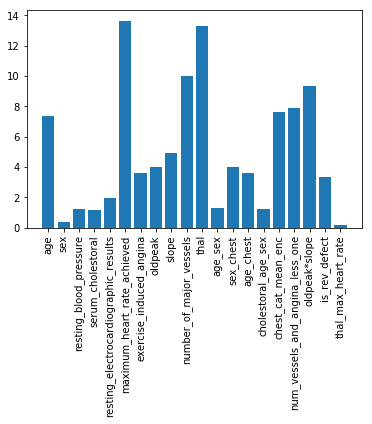

In [351]:
feat_imp = cat_x_3_for_stack.get_feature_importance(Pool(train_cv_3.drop('class',axis = 1)))
plt.figure()
plt.bar(train_cv_3.drop('class',axis = 1).columns.values, feat_imp)
plt.xticks(rotation = 90)
plt.show()

In [352]:
#Ok, awesome nor stacking.

In [353]:
train_pred_x_3 = cat_x_3_for_stack.predict_proba(train_cv_3.drop('class',axis = 1), ntree_end=cat_x_3_for_stack.best_iteration_)

In [354]:
val_pred_x_3 = cat_x_3_for_stack.predict_proba(val_cv_3.drop('class',axis = 1),ntree_end=cat_x_3_for_stack.best_iteration_)

In [355]:
stack_train_cv_3_mix = pd.DataFrame({'c1':train_pred_x_1[:,1],'c2':train_pred_x_2[:,1], 'c3':train_pred_x_3[:,1]})

In [356]:
stack_val_cv_3_mix = pd.DataFrame({'c1':val_pred_x_1[:,1],'c2':val_pred_x_2[:,1], 'c3':val_pred_x_3[:,1]})

In [357]:
#Logisitc upper layer.

In [358]:
lm_stack_cv = LogisticRegression()
lm_stack_cv.fit(stack_train_cv_3_mix, train_cv_1['class'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [359]:
lm_stack_cv.score(stack_train_cv_3_mix, train_cv_1['class'])

0.9040222222222222

In [360]:
lm_stack_cv.score(stack_val_cv_3_mix, val_cv_1['class'])

0.9042866666666667

In [361]:
#ok, predicting test set

In [362]:
params_1_full_for_stack = {'iterations':cat_x_1_for_stack.best_iteration_, 'learning_rate':0.2, 'depth':5,'eval_metric':'Accuracy','random_seed':333,'use_best_model':True,'early_stopping_rounds':30,
          'thread_count':5}
cat_x_1_full_for_stack = CatBoostClassifier(**params_1_full_for_stack)
cat_x_1_full_for_stack.fit(train_df_1.drop('class',axis = 1), train_df_1['class'],eval_set=(train_df_1.drop('class',axis = 1), train_df_1['class']),verbose = 1)

0:	learn: 0.8649633	test: 0.8649633	best: 0.8649633 (0)	total: 231ms	remaining: 28.4s
1:	learn: 0.8780933	test: 0.8780933	best: 0.8780933 (1)	total: 531ms	remaining: 32.4s
2:	learn: 0.8750267	test: 0.8750267	best: 0.8780933 (1)	total: 866ms	remaining: 34.9s
3:	learn: 0.8788350	test: 0.8788350	best: 0.8788350 (3)	total: 1.22s	remaining: 36.7s
4:	learn: 0.8819567	test: 0.8819567	best: 0.8819567 (4)	total: 1.52s	remaining: 36.1s
5:	learn: 0.8859833	test: 0.8859833	best: 0.8859833 (5)	total: 1.8s	remaining: 35.4s
6:	learn: 0.8869750	test: 0.8869750	best: 0.8869750 (6)	total: 2.08s	remaining: 34.8s
7:	learn: 0.8894733	test: 0.8894733	best: 0.8894733 (7)	total: 2.42s	remaining: 35s
8:	learn: 0.8913400	test: 0.8913400	best: 0.8913400 (8)	total: 2.65s	remaining: 33.9s
9:	learn: 0.8919983	test: 0.8919983	best: 0.8919983 (9)	total: 2.91s	remaining: 33.2s
10:	learn: 0.8935467	test: 0.8935467	best: 0.8935467 (10)	total: 3.2s	remaining: 32.9s
11:	learn: 0.8945900	test: 0.8945900	best: 0.8945900 (11

94:	learn: 0.9035117	test: 0.9035117	best: 0.9035117 (94)	total: 24.9s	remaining: 7.6s
95:	learn: 0.9036717	test: 0.9036717	best: 0.9036717 (95)	total: 25.2s	remaining: 7.34s
96:	learn: 0.9036800	test: 0.9036800	best: 0.9036800 (96)	total: 25.5s	remaining: 7.1s
97:	learn: 0.9036633	test: 0.9036633	best: 0.9036800 (96)	total: 25.8s	remaining: 6.84s
98:	learn: 0.9036933	test: 0.9036933	best: 0.9036933 (98)	total: 26.1s	remaining: 6.58s
99:	learn: 0.9037100	test: 0.9037100	best: 0.9037100 (99)	total: 26.3s	remaining: 6.3s
100:	learn: 0.9037317	test: 0.9037317	best: 0.9037317 (100)	total: 26.6s	remaining: 6.05s
101:	learn: 0.9037783	test: 0.9037783	best: 0.9037783 (101)	total: 26.8s	remaining: 5.78s
102:	learn: 0.9038733	test: 0.9038733	best: 0.9038733 (102)	total: 27s	remaining: 5.51s
103:	learn: 0.9038867	test: 0.9038867	best: 0.9038867 (103)	total: 27.2s	remaining: 5.24s
104:	learn: 0.9039067	test: 0.9039067	best: 0.9039067 (104)	total: 27.5s	remaining: 4.97s
105:	learn: 0.9039317	test:

In [304]:
params_2_full_for_stack = {'iterations':cat_x_2_for_stack.best_iteration_, 'learning_rate':0.2, 'depth':5,'eval_metric':'Accuracy','random_seed':333,'use_best_model':True,'early_stopping_rounds':30,
          'thread_count':5}
cat_x_2_full_for_stack = CatBoostClassifier(**params_2_full_for_stack)
cat_x_2_full_for_stack.fit(train_df_2.drop('class',axis = 1), train_df_2['class'],eval_set=(train_df_2.drop('class',axis = 1), train_df_2['class']),verbose = 1)

0:	learn: 0.8786350	test: 0.8786350	best: 0.8786350 (0)	total: 255ms	remaining: 19.9s
1:	learn: 0.8798083	test: 0.8798083	best: 0.8798083 (1)	total: 528ms	remaining: 20.3s
2:	learn: 0.8844350	test: 0.8844350	best: 0.8844350 (2)	total: 874ms	remaining: 22.1s
3:	learn: 0.8868183	test: 0.8868183	best: 0.8868183 (3)	total: 1.18s	remaining: 22.2s
4:	learn: 0.8895800	test: 0.8895800	best: 0.8895800 (4)	total: 1.5s	remaining: 22.2s
5:	learn: 0.8917867	test: 0.8917867	best: 0.8917867 (5)	total: 1.75s	remaining: 21.3s
6:	learn: 0.8925533	test: 0.8925533	best: 0.8925533 (6)	total: 2.09s	remaining: 21.5s
7:	learn: 0.8942933	test: 0.8942933	best: 0.8942933 (7)	total: 2.33s	remaining: 20.7s
8:	learn: 0.8954433	test: 0.8954433	best: 0.8954433 (8)	total: 2.66s	remaining: 20.7s
9:	learn: 0.8958767	test: 0.8958767	best: 0.8958767 (9)	total: 2.9s	remaining: 20s
10:	learn: 0.8969067	test: 0.8969067	best: 0.8969067 (10)	total: 3.22s	remaining: 19.9s
11:	learn: 0.8976850	test: 0.8976850	best: 0.8976850 (11

In [364]:
params_3_full_for_stack = {'iterations':cat_x_3_for_stack.best_iteration_, 'learning_rate':0.2, 'depth':5,'eval_metric':'Accuracy','random_seed':333,'use_best_model':True,'early_stopping_rounds':30,
          'thread_count':5}
cat_x_3_full_for_stack = CatBoostClassifier(**params_3_full_for_stack)
cat_x_3_full_for_stack.fit(train_df_3.drop('class',axis = 1), train_df_3['class'],eval_set=(train_df_3.drop('class',axis = 1), train_df_3['class']),verbose = 1)

0:	learn: 0.8709567	test: 0.8709567	best: 0.8709567 (0)	total: 265ms	remaining: 39.5s
1:	learn: 0.8749167	test: 0.8749167	best: 0.8749167 (1)	total: 450ms	remaining: 33.3s
2:	learn: 0.8775900	test: 0.8775900	best: 0.8775900 (2)	total: 701ms	remaining: 34.4s
3:	learn: 0.8805333	test: 0.8805333	best: 0.8805333 (3)	total: 971ms	remaining: 35.5s
4:	learn: 0.8837067	test: 0.8837067	best: 0.8837067 (4)	total: 1.23s	remaining: 35.7s
5:	learn: 0.8857917	test: 0.8857917	best: 0.8857917 (5)	total: 1.52s	remaining: 36.4s
6:	learn: 0.8866950	test: 0.8866950	best: 0.8866950 (6)	total: 1.8s	remaining: 36.8s
7:	learn: 0.8893283	test: 0.8893283	best: 0.8893283 (7)	total: 2.06s	remaining: 36.5s
8:	learn: 0.8893133	test: 0.8893133	best: 0.8893283 (7)	total: 2.5s	remaining: 39.2s
9:	learn: 0.8911600	test: 0.8911600	best: 0.8911600 (9)	total: 2.74s	remaining: 38.3s
10:	learn: 0.8919833	test: 0.8919833	best: 0.8919833 (10)	total: 2.98s	remaining: 37.7s
11:	learn: 0.8928450	test: 0.8928450	best: 0.8928450 (

94:	learn: 0.9037000	test: 0.9037000	best: 0.9037000 (94)	total: 23.8s	remaining: 13.8s
95:	learn: 0.9037283	test: 0.9037283	best: 0.9037283 (95)	total: 24s	remaining: 13.5s
96:	learn: 0.9037583	test: 0.9037583	best: 0.9037583 (96)	total: 24.3s	remaining: 13.3s
97:	learn: 0.9037050	test: 0.9037050	best: 0.9037583 (96)	total: 24.6s	remaining: 13s
98:	learn: 0.9037500	test: 0.9037500	best: 0.9037583 (96)	total: 24.8s	remaining: 12.8s
99:	learn: 0.9037900	test: 0.9037900	best: 0.9037900 (99)	total: 25s	remaining: 12.5s
100:	learn: 0.9038017	test: 0.9038017	best: 0.9038017 (100)	total: 25.2s	remaining: 12.2s
101:	learn: 0.9037983	test: 0.9037983	best: 0.9038017 (100)	total: 25.4s	remaining: 12s
102:	learn: 0.9038367	test: 0.9038367	best: 0.9038367 (102)	total: 25.7s	remaining: 11.7s
103:	learn: 0.9038150	test: 0.9038150	best: 0.9038367 (102)	total: 26s	remaining: 11.5s
104:	learn: 0.9038000	test: 0.9038000	best: 0.9038367 (102)	total: 26.2s	remaining: 11.2s
105:	learn: 0.9038283	test: 0.90

In [365]:
train_pred_full_x_1 = cat_x_1_full_for_stack.predict_proba(train_df_1.drop('class',axis = 1), ntree_end=cat_x_1_for_stack.best_iteration_)

In [366]:
test_pred_full_x_1 = cat_x_1_full_for_stack.predict_proba(test_df_1, ntree_end=cat_x_1_for_stack.best_iteration_)

In [367]:
train_pred_full_x_2 = cat_x_2_full_for_stack.predict_proba(train_df_2.drop('class',axis = 1), ntree_end=cat_x_2_for_stack.best_iteration_)

In [368]:
test_pred_full_x_2 = cat_x_2_full_for_stack.predict_proba(test_df_2, ntree_end=cat_x_2_for_stack.best_iteration_)

In [369]:
train_pred_full_x_3 = cat_x_3_full_for_stack.predict_proba(train_df_3.drop('class',axis = 1), ntree_end=cat_x_3_for_stack.best_iteration_)

In [370]:
test_pred_full_x_3 = cat_x_3_full_for_stack.predict_proba(test_df_3, ntree_end=cat_x_3_for_stack.best_iteration_)

In [371]:
stack_train_full_3_mix = pd.DataFrame({'c1':train_pred_full_x_1[:,1],'c2':train_pred_full_x_2[:,1], 'c3':train_pred_full_x_3[:,1]})

In [372]:
stack_test_full_3_mix = pd.DataFrame({'c1':test_pred_full_x_1[:,1],'c2':test_pred_full_x_2[:,1], 'c3':test_pred_full_x_3[:,1]})

In [373]:
lm_stack_full = LogisticRegression()
lm_stack_full.fit(stack_train_full_3_mix, train_df_1['class'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [374]:
lm_stack_full.score(stack_train_full_3_mix, train_df_1['class'])

0.9043483333333333

In [375]:
stack_god = lm_stack_full.predict(stack_test_full_3_mix)

In [376]:
submit = pd.DataFrame({'ID': for_id['ID'], 'class':stack_god})

In [377]:
submit['class'] = submit['class'].astype(int)

In [380]:
submit.to_csv('stack_god_depth_5_0_2.csv', index = False)